# LUME-services demo
In this notebook, we will configure LUME-services to use the service configuration used to launch our docker-compose services. Make sure you've completed all steps outlined in https://slaclab.github.io/lume-services/demo/.

In [1]:
import logging
logging.basicConfig(level=logging.INFO)  # Lets check the logs

## Configure services
LUME-services is packages with a configuration utility that reads environment variables and initializes services:

In [2]:
from lume_services import config
config.configure()

INFO:lume_services.config:Configuring LUME-services environment...
INFO:lume_services.config:Environment configured.


## if you're running this many time, creation will fail because of uniqueness... You can reset since this is a dev server

In [3]:
#model_db_service._reset()

## Create a model
The LUME-services Model provides an API to all model services and facilitates all model operations.

In [4]:
from lume_services.models import Model

model = Model.create_model(
    author = "Aman Singh Thakur",
    laboratory = "slac",
    facility = "lcls",
    beampath = "cu",
    description = "lcls-cu-inj-nn"
)
model

INFO:lume_services.services.models.db.db:ModelDB selecting: SELECT model.model_id, model.created, model.author, model.laboratory, model.facility, model.beampath, model.description 
FROM model 
WHERE model.author = :author_1 AND model.laboratory = :laboratory_1 AND model.facility = :facility_1 AND model.beampath = :beampath_1 AND model.description = :description_1
INFO:lume_services.services.models.db.db:ModelDB inserting: INSERT INTO model (author, laboratory, facility, beampath, description) VALUES (:author, :laboratory, :facility, :beampath, :description)
INFO:lume_services.services.models.db.db:Sucessfully executed: INSERT INTO model (author, laboratory, facility, beampath, description) VALUES (:author, :laboratory, :facility, :beampath, :description)
INFO:lume_services.services.models.db.db:ModelDB selecting: SELECT model.model_id, model.created, model.author, model.laboratory, model.facility, model.beampath, model.description 
FROM model 
WHERE model.model_id = :model_id_1


Model(metadata=Model(                     model_id=1,                     created=datetime.datetime(2023, 8, 2, 18, 25, 39),                     author='Aman Singh Thakur'),                     laboratory='slac',                     facility='lcls',                     beampath='cu',                     description='lcls-cu-inj-nn'                 ), deployment=None, results=None)

## Create a project
Workflows are organized by the Prefect scheduler into different projects. Below, we access the configured services directly (TODO create project registry utility)

In [5]:
model_db_service = config.context.model_db_service()
scheduling_service = config.context.scheduling_service()

In [6]:
### NOTE: The below cell will raise an error if run 2x

In [7]:
# create a project
project_name = model_db_service.store_project(
    project_name="gpu-new-box", description="my_description"
)
scheduling_service.create_project("gpu-new-box")

INFO:lume_services.services.models.db.db:ModelDB inserting: INSERT INTO project (project_name, description) VALUES (:project_name, :description)
INFO:lume_services.services.models.db.db:Sucessfully executed: INSERT INTO project (project_name, description) VALUES (:project_name, :description)


You can now find this project in you Prefect UI at http://localhost:8080


![project](https://slaclab.github.io/lume-services/files/project_nav.png)

## Create a deployment for your model
Replace `source_path` with the path to your release tarball below:

In [8]:
#source_path = "https://github.com/jacquelinegarrahan/lume-lcls-cu-inj-nn/releases/download/v0.0.12/lume_lcls_cu_inj_nn-0.0.12.tar.gz"

source_path = "https://github.com/singh96aman/lume-lcls-cu-inj-nn/releases/download/v0.0.35/lume_lcls_cu_inj_nn-0.0.35.tar.gz"

# populates local channel
model.store_deployment(source_path, project_name="gpu-new-box")
model

INFO:lume_services.models.model:installing package
INFO:lume_services.environment.solver:https://github.com/singh96aman/lume-lcls-cu-inj-nn/releases/download/v0.0.35/lume_lcls_cu_inj_nn-0.0.35.tar.gz saved to /tmp/tmp5xi8f1wy/lume_lcls_cu_inj_nn-0.0.35.tar.gz
INFO:lume_services.environment.solver:Uninstall complete
INFO:lume_services.environment.solver:Installing dependencies...


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.7.2

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.2


INFO:lume_services.environment.solver:Dependency installation complete
INFO:lume_services.environment.solver:https://github.com/singh96aman/lume-lcls-cu-inj-nn/releases/download/v0.0.35/lume_lcls_cu_inj_nn-0.0.35.tar.gz saved to /tmp/tmpr7toolk2/lume_lcls_cu_inj_nn-0.0.35.tar.gz


['/home/thakur12/.conda/envs/lume-lcls-cu-inj-nn-torch/bin/python', '-m', 'pip', 'install', '--no-deps', '-v', '/tmp/tmpr7toolk2/lume_lcls_cu_inj_nn-0.0.35.tar.gz']


  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-lh1vkxe1/lume_lcls_cu_inj_nn.egg-info
  writing /tmp/pip-pip-egg-info-lh1vkxe1/lume_lcls_cu_inj_nn.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-lh1vkxe1/lume_lcls_cu_inj_nn.egg-info/dependency_links.txt
  writing entry points to /tmp/pip-pip-egg-info-lh1vkxe1/lume_lcls_cu_inj_nn.egg-info/entry_points.txt
  writing requirements to /tmp/pip-pip-egg-info-lh1vkxe1/lume_lcls_cu_inj_nn.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-lh1vkxe1/lume_lcls_cu_inj_nn.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-lh1vkxe1/lume_lcls_cu_inj_nn.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-lh1vkxe1/lume_lcls_cu_inj_nn.egg-info/SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  writing manifest file '/tmp/pip-pip-egg-info-lh1vkxe1/lume_lcls_cu_inj_nn.egg-info/SOURCES.txt'
  Running command python setup.py bd

Inside flow
Hey1
<Task: prepare_lume_model_variables>
Flow URL: http://localhost:8080/default/flow/4961b7d5-e62f-417f-9d9e-5d0eaaef5473
 └── ID: 91d2bda4-7ae3-4175-ae22-d8d99be69d4c
 └── Project: gpu-new-box
 └── Labels: ['lume-services']


INFO:lume_services.models.model:Deployment loaded.
INFO:lume_services.services.models.db.db:ModelDB selecting: SELECT flow.flow_id, flow.flow_name, flow.project_name, flow.deployment_id 
FROM flow 
WHERE flow.deployment_id = :deployment_id_1
INFO:lume_services.services.models.db.db:ModelDB selecting: SELECT project.project_name, project.description 
FROM project 
WHERE project.project_name = :project_name_1
INFO:lume_services.services.models.db.db:ModelDB selecting: SELECT flow_of_flows._id, flow_of_flows.parent_flow_id, flow_of_flows.flow_id, flow_of_flows.position 
FROM flow_of_flows 
WHERE flow_of_flows.parent_flow_id = :parent_flow_id_1


Model(metadata=Model(                     model_id=1,                     created=datetime.datetime(2023, 8, 2, 18, 25, 39),                     author='Aman Singh Thakur'),                     laboratory='slac',                     facility='lcls',                     beampath='cu',                     description='lcls-cu-inj-nn'                 ), deployment=Deployment(metadata=Deployment(                 deployment_id=1,                 model_id=1,                 version='0.0.35',                 deploy_date=datetime.datetime(2023, 8, 2, 18, 26, 52)),                 asset_dir=None,                 source='https://github.com/singh96aman/lume-lcls-cu-inj-nn/releases/download/v0.0.35/lume_lcls_cu_inj_nn-0.0.35.tar.gz',                 sha256='648ec5aad9edf84301d76de7780d3b171968f8ed395146ffd55102df78cea02d',                 image='scr.svc.stanford.edu/aman96/lume-lcls-cu-inj-nn:v0.0.35',                 is_live=True                 package_import_name='lume_lcls_cu_inj_nn'          

## Run the Prefect workflow directly

In [65]:
flow_run = model.deployment.flow.prefect_flow.run(**
                                                  {'distgen:r_dist:sigma_xy:value': 0.3922119814518944,
         'distgen:t_dist:length:value': 5.837769949968263,
         'distgen:total_charge:value': 250.0,
         'SOL1:solenoid_field_scale': 0.22998059682676109,
         'CQ01:b1_gradient': 0.00039223148891580177,
         'SQ01:b1_gradient': -0.006474140400668958,
         'L0A_scale:voltage': 58000000.0,
         'L0A_phase:dtheta0_deg': 2.7935416436475613,
         'L0B_scale:voltage': 70000000.0,
         'L0B_phase:dtheta0_deg': -9.868970006934532,
         'QA01:b1_gradient': 2.148610673734787,
         'QA02:b1_gradient': -2.415736249838486,
         'QE01:b1_gradient': 2.4072092546393677,
         'QE02:b1_gradient': 0.7181288513711621,
         'QE03:b1_gradient': -3.748759799913311,
         'QE04:b1_gradient': 2.3394975820698316
                 }
)


[2023-08-02 12:42:30-0700] INFO - prefect.FlowRunner | Beginning Flow run for 'lume-lcls-cu-inj-nn'


INFO:prefect.FlowRunner:Beginning Flow run for 'lume-lcls-cu-inj-nn'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'distgen:t_dist:length:value': Starting task run...


INFO:prefect.TaskRunner:Task 'distgen:t_dist:length:value': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'distgen:t_dist:length:value': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'distgen:t_dist:length:value': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'SQ01:b1_gradient': Starting task run...


INFO:prefect.TaskRunner:Task 'SQ01:b1_gradient': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'SQ01:b1_gradient': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'SQ01:b1_gradient': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'QA02:b1_gradient': Starting task run...


INFO:prefect.TaskRunner:Task 'QA02:b1_gradient': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'QA02:b1_gradient': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'QA02:b1_gradient': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'QE01:b1_gradient': Starting task run...


INFO:prefect.TaskRunner:Task 'QE01:b1_gradient': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'QE01:b1_gradient': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'QE01:b1_gradient': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'QE04:b1_gradient': Starting task run...


INFO:prefect.TaskRunner:Task 'QE04:b1_gradient': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'QE04:b1_gradient': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'QE04:b1_gradient': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'distgen:total_charge:value': Starting task run...


INFO:prefect.TaskRunner:Task 'distgen:total_charge:value': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'distgen:total_charge:value': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'distgen:total_charge:value': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'L0A_scale:voltage': Starting task run...


INFO:prefect.TaskRunner:Task 'L0A_scale:voltage': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'L0A_scale:voltage': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'L0A_scale:voltage': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'L0B_scale:voltage': Starting task run...


INFO:prefect.TaskRunner:Task 'L0B_scale:voltage': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'L0B_scale:voltage': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'L0B_scale:voltage': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'QE02:b1_gradient': Starting task run...


INFO:prefect.TaskRunner:Task 'QE02:b1_gradient': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'QE02:b1_gradient': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'QE02:b1_gradient': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'configure_lume_services': Starting task run...


INFO:prefect.TaskRunner:Task 'configure_lume_services': Starting task run...
INFO:lume_services.config:Configuring LUME-services environment...
INFO:lume_services.config:Environment configured.


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'configure_lume_services': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'configure_lume_services': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'SOL1:solenoid_field_scale': Starting task run...


INFO:prefect.TaskRunner:Task 'SOL1:solenoid_field_scale': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'SOL1:solenoid_field_scale': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'SOL1:solenoid_field_scale': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'L0A_phase:dtheta0_deg': Starting task run...


INFO:prefect.TaskRunner:Task 'L0A_phase:dtheta0_deg': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'L0A_phase:dtheta0_deg': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'L0A_phase:dtheta0_deg': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'L0B_phase:dtheta0_deg': Starting task run...


INFO:prefect.TaskRunner:Task 'L0B_phase:dtheta0_deg': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'L0B_phase:dtheta0_deg': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'L0B_phase:dtheta0_deg': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'CQ01:b1_gradient': Starting task run...


INFO:prefect.TaskRunner:Task 'CQ01:b1_gradient': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'CQ01:b1_gradient': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'CQ01:b1_gradient': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'QA01:b1_gradient': Starting task run...


INFO:prefect.TaskRunner:Task 'QA01:b1_gradient': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'QA01:b1_gradient': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'QA01:b1_gradient': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'distgen:r_dist:sigma_xy:value': Starting task run...


INFO:prefect.TaskRunner:Task 'distgen:r_dist:sigma_xy:value': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'distgen:r_dist:sigma_xy:value': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'distgen:r_dist:sigma_xy:value': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'QE03:b1_gradient': Starting task run...


INFO:prefect.TaskRunner:Task 'QE03:b1_gradient': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'QE03:b1_gradient': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'QE03:b1_gradient': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'List': Starting task run...


INFO:prefect.TaskRunner:Task 'List': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'List': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'List': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'Dict': Starting task run...


INFO:prefect.TaskRunner:Task 'Dict': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'Dict': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'Dict': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'check_local_execution': Starting task run...


INFO:prefect.TaskRunner:Task 'check_local_execution': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'check_local_execution': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'check_local_execution': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'case(False)': Starting task run...


INFO:prefect.TaskRunner:Task 'case(False)': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'case(False)': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'case(False)': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'prepare_lume_model_variables': Starting task run...


INFO:prefect.TaskRunner:Task 'prepare_lume_model_variables': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'prepare_lume_model_variables': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'prepare_lume_model_variables': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'preprocessing_task': Starting task run...


INFO:prefect.TaskRunner:Task 'preprocessing_task': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Hey2


INFO:prefect.TaskRunner:Hey2


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | {'distgen:r_dist:sigma_xy:value': ScalarInputVariable(variable_type='scalar', units=None, parent_variable=None, value_range=[0.21021247820852546, 0.4999996083265339], name='distgen:r_dist:sigma_xy:value', value=0.13073731407689876, precision=None, default=0.423867825, is_constant=False), 'distgen:t_dist:length:value': ScalarInputVariable(variable_type='scalar', units=None, parent_variable=None, value_range=[3.000000758511308, 11.998569812014836], name='distgen:t_dist:length:value', value=9.632320417447634, precision=None, default=3.06083484, is_constant=False), 'distgen:total_charge:value': ScalarInputVariable(variable_type='scalar', units=None, parent_variable=None, value_range=[250.0, 250.0], name='distgen:total_charge:value', value=4.005441585e-05, precision=None, default=250.0, is_constant=False), 'SOL1:solenoid_field_scale': ScalarInputVariable(variable_type='scalar', units=None, parent_variable=None, value_range=[0.1940905333

INFO:prefect.TaskRunner:{'distgen:r_dist:sigma_xy:value': ScalarInputVariable(variable_type='scalar', units=None, parent_variable=None, value_range=[0.21021247820852546, 0.4999996083265339], name='distgen:r_dist:sigma_xy:value', value=0.13073731407689876, precision=None, default=0.423867825, is_constant=False), 'distgen:t_dist:length:value': ScalarInputVariable(variable_type='scalar', units=None, parent_variable=None, value_range=[3.000000758511308, 11.998569812014836], name='distgen:t_dist:length:value', value=9.632320417447634, precision=None, default=3.06083484, is_constant=False), 'distgen:total_charge:value': ScalarInputVariable(variable_type='scalar', units=None, parent_variable=None, value_range=[250.0, 250.0], name='distgen:total_charge:value', value=4.005441585e-05, precision=None, default=250.0, is_constant=False), 'SOL1:solenoid_field_scale': ScalarInputVariable(variable_type='scalar', units=None, parent_variable=None, value_range=[0.19409053333889578, 0.2563030896232562], n

[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'preprocessing_task': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'preprocessing_task': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'evaluate': Starting task run...


INFO:prefect.TaskRunner:Task 'evaluate': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Hey 3


INFO:prefect.TaskRunner:Hey 3


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | ['Run.ipynb', '.ipynb_checkpoints', 'RunPyTorchFlow.ipynb', 'model', 'info', 'demo.env']


INFO:prefect.TaskRunner:['Run.ipynb', '.ipynb_checkpoints', 'RunPyTorchFlow.ipynb', 'model', 'info', 'demo.env']


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Hey 4


INFO:prefect.TaskRunner:Hey 4


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | tensor([1.3961e+10, 8.8736e+10, 6.3340e+09, 3.1213e+07, 9.2256e+07],
       dtype=torch.float64)


INFO:prefect.TaskRunner:tensor([1.3961e+10, 8.8736e+10, 6.3340e+09, 3.1213e+07, 9.2256e+07],
       dtype=torch.float64)


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'evaluate': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'evaluate': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'format_result': Starting task run...


INFO:prefect.TaskRunner:Task 'format_result': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Hey 5


INFO:prefect.TaskRunner:Hey 5


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Final Result


INFO:prefect.TaskRunner:Final Result


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | project_name='local' id=None flow_id='lume-lcls-cu-inj-nn' inputs={'distgen:r_dist:sigma_xy:value': 0.13073731407689876, 'distgen:t_dist:length:value': 9.632320417447634, 'distgen:total_charge:value': 4.005441585e-05, 'SOL1:solenoid_field_scale': 0.11827267808314273, 'CQ01:b1_gradient': -0.00018677689940900435, 'SQ01:b1_gradient': 0.0030829239990853817, 'L0A_scale:voltage': 58000000000000.0, 'L0A_phase:dtheta0_deg': 2.7935416436475613, 'L0B_scale:voltage': 70000000000000.0, 'L0B_phase:dtheta0_deg': -9.868970006934532, 'QA01:b1_gradient': -1.9894543276913668, 'QA02:b1_gradient': 2.236792824103467, 'QE01:b1_gradient': -2.2288974581777263, 'QE02:b1_gradient': -0.6649341216931597, 'QE03:b1_gradient': 3.4710738890863073, 'QE04:b1_gradient': -2.1662014650527697} outputs={'sigma_x': 13960970485.12798, 'sigma_y': 88736420514.61249, 'sigma_z': 6334030767.782163, 'norm_emit_x': 31212689.843273308, 'norm_emit_y': 92256092.63675001} date_modif

INFO:prefect.TaskRunner:project_name='local' id=None flow_id='lume-lcls-cu-inj-nn' inputs={'distgen:r_dist:sigma_xy:value': 0.13073731407689876, 'distgen:t_dist:length:value': 9.632320417447634, 'distgen:total_charge:value': 4.005441585e-05, 'SOL1:solenoid_field_scale': 0.11827267808314273, 'CQ01:b1_gradient': -0.00018677689940900435, 'SQ01:b1_gradient': 0.0030829239990853817, 'L0A_scale:voltage': 58000000000000.0, 'L0A_phase:dtheta0_deg': 2.7935416436475613, 'L0B_scale:voltage': 70000000000000.0, 'L0B_phase:dtheta0_deg': -9.868970006934532, 'QA01:b1_gradient': -1.9894543276913668, 'QA02:b1_gradient': 2.236792824103467, 'QE01:b1_gradient': -2.2288974581777263, 'QE02:b1_gradient': -0.6649341216931597, 'QE03:b1_gradient': 3.4710738890863073, 'QE04:b1_gradient': -2.1662014650527697} outputs={'sigma_x': 13960970485.12798, 'sigma_y': 88736420514.61249, 'sigma_z': 6334030767.782163, 'norm_emit_x': 31212689.843273308, 'norm_emit_y': 92256092.63675001} date_modified=datetime.datetime(2023, 8, 

[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'format_result': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'format_result': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'save_db_result': Starting task run...


INFO:prefect.TaskRunner:Task 'save_db_result': Starting task run...


[2023-08-02 12:42:30-0700] INFO - prefect.TaskRunner | Task 'save_db_result': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'save_db_result': Finished task run for task with final state: 'Success'


[2023-08-02 12:42:30-0700] INFO - prefect.FlowRunner | Flow run SUCCESS: all reference tasks succeeded


INFO:prefect.FlowRunner:Flow run SUCCESS: all reference tasks succeeded


## Run the workflow inside the service cluster
We can use the model interface to directly deploy workflows. When sourcing our environment (`docs/examples/demo.env`), we defined a mount point for the file system using the alias `/lume-services/data`. Let's kick off this workflow and save the file output to that directory. 
After running the next cell, you'll be able to see the running container in your docker desktop and examine the flow using the Prefect UI at http://localhost:8080/default?flows.

In [62]:
model.run(
    parameters = {'distgen:r_dist:sigma_xy:value': 0.3922119814518944,
         'distgen:t_dist:length:value': 5.837769949968263,
         'distgen:total_charge:value': 250.0,
         'SOL1:solenoid_field_scale': 0.22998059682676109,
         'CQ01:b1_gradient': 0.00039223148891580177,
         'SQ01:b1_gradient': -0.006474140400668958,
         'L0A_scale:voltage': 58000000.0,
         'L0A_phase:dtheta0_deg': 2.7935416436475613,
         'L0B_scale:voltage': 70000000.0,
         'L0B_phase:dtheta0_deg': -9.868970006934532,
         'QA01:b1_gradient': 2.148610673734787,
         'QA02:b1_gradient': -2.415736249838486,
         'QE01:b1_gradient': 2.4072092546393677,
         'QE02:b1_gradient': 0.7181288513711621,
         'QE03:b1_gradient': -3.748759799913311,
         'QE04:b1_gradient': 2.3394975820698316
                 }
)

In [63]:
model.deployment.flow

Flow(name='lume-lcls-cu-inj-nn', flow_id='91d2bda4-7ae3-4175-ae22-d8d99be69d4c', project_name='gpu-new-box', prefect_flow=<Flow: name="lume-lcls-cu-inj-nn">, parameters=None, mapped_parameters=None, task_slugs=None, labels=['lume-services'], image='scr.svc.stanford.edu/aman96/lume-lcls-cu-inj-nn:v0.0.35')

# Get results:

In [12]:
results = model.get_results()

results

[Result(project_name='local', id='64caa061413008c5934f5385', flow_id='91d2bda4-7ae3-4175-ae22-d8d99be69d4c', inputs={'distgen:r_dist:sigma_xy:value': 0.1376666529, 'distgen:t_dist:length:value': 12.374624528658504, 'distgen:total_charge:value': 4.005441585e-05, 'SOL1:solenoid_field_scale': 0.0874263114, 'CQ01:b1_gradient': 0.0035238095224, 'SQ01:b1_gradient': 0.0035238095224, 'L0A_scale:voltage': 70000000000000.0, 'L0A_phase:dtheta0_deg': -8.8997, 'L0B_scale:voltage': 70000000000000.0, 'L0B_phase:dtheta0_deg': 9.85566222, 'QA01:b1_gradient': -1.7151851945816592, 'QA02:b1_gradient': 1.7151851945816592, 'QE01:b1_gradient': -0.17333333519905186, 'QE02:b1_gradient': -0.1537962963086, 'QE03:b1_gradient': 2.4452777779734, 'QE04:b1_gradient': -2.7592592502207407}, outputs={'sigma_x': 15781042984.541616, 'sigma_y': 98044304869.09476, 'sigma_z': 6923430521.038898, 'norm_emit_x': 33789537.38230388, 'norm_emit_y': 101996504.75681177}, date_modified=datetime.datetime(2023, 8, 2, 18, 28, 44, 277000

In [16]:
results_df = model.get_results_df()
results_df

,project_name,flow_id,distgen:r_dist:sigma_xy:value,distgen:t_dist:length:value,distgen:total_charge:value,SOL1:solenoid_field_scale,CQ01:b1_gradient,SQ01:b1_gradient,L0A_scale:voltage,L0A_phase:dtheta0_deg,...,QE03:b1_gradient,QE04:b1_gradient,sigma_x,sigma_y,sigma_z,norm_emit_x,norm_emit_y,date_modified,unique_hash,result_type_string
0,local,91d2bda4-7ae3-4175-ae22-d8d99be69d4c,0.137667,12.374625,0.00004,0.087426,0.003524,0.003524,7.000000e+13,-8.8997,...,2.445278,-2.759259,1.578104e+10,9.804430e+10,6.923431e+09,3.378954e+07,1.019965e+08,2023-08-02 18:28:44.277,633ed219eee9a608450384c49ec74afd,lume_services.results.generic.Result
1,local,91d2bda4-7ae3-4175-ae22-d8d99be69d4c,0.137667,12.374625,0.00004,0.087426,0.003524,0.003524,7.000000e+13,-8.8997,...,-0.000000,-0.000000,9.668138e+09,5.486262e+10,3.585886e+09,1.606390e+07,5.812364e+07,2023-08-02 18:30:13.864,124c16a27d9756e5232608ee3bc2c611,lume_services.results.generic.Result


In [39]:
#Iterate Through Input -
import torch
from lume_model.utils import variables_from_yaml

input_variables, output_variables = variables_from_yaml(open("model/variables.yml"))

inputs_small = torch.load("info/inputs_small.pt")
outputs_small = torch.load("info/outputs_small.pt")

inputs_small = inputs_small.tolist()

for j, input in enumerate(inputs_small):
    parameter_dict = {}
    for i, key in enumerate(list(input_variables.keys())):
        parameter_dict[key] = input[i]
    model.run(
        parameters = parameter_dict
    ) 
    print(j)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [61]:
results_df = model.get_results_df()
results_analysis_df = results_df.tail(len(outputs_small))
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
results_analysis_df

,project_name,flow_id,distgen:r_dist:sigma_xy:value,distgen:t_dist:length:value,distgen:total_charge:value,SOL1:solenoid_field_scale,CQ01:b1_gradient,SQ01:b1_gradient,L0A_scale:voltage,L0A_phase:dtheta0_deg,...,QE03:b1_gradient,QE04:b1_gradient,sigma_x,sigma_y,sigma_z,norm_emit_x,norm_emit_y,date_modified,unique_hash,result_type_string
36,local,91d2bda4-7ae3-4175-ae22-d8d99be69d4c,0.126751,12.711213,0.000040,0.122769,0.000319,-0.001625,58000000000000.000000,-23.663668,...,5.735181,-3.331524,13960970485.127405,88736420514.612457,6334030767.782218,31212689.843274,92256092.636750,2023-08-02 19:10:35.376,7cf1bbb54a357861d3d38bc37f0616fb,lume_services.results.generic.Result
37,local,91d2bda4-7ae3-4175-ae22-d8d99be69d4c,0.151916,15.947556,0.000040,0.113435,-0.004751,0.004164,58000000000000.000000,0.272906,...,4.162508,-4.074572,13960970485.127516,88736420514.613327,6334030767.782199,31212689.843274,92256092.636750,2023-08-02 19:10:35.356,c895b7df987887fc107b047f6547e6e2,lume_services.results.generic.Result
38,local,91d2bda4-7ae3-4175-ae22-d8d99be69d4c,0.164094,7.039449,0.000040,0.118204,-0.003612,0.001318,58000000000000.000000,-12.496416,...,3.370419,-2.399250,13960970485.128111,88736420514.612366,6334030767.782142,31212689.843273,92256092.636750,2023-08-02 19:10:37.380,debb8ee52ebbfb21420529672c064162,lume_services.results.generic.Result
39,local,91d2bda4-7ae3-4175-ae22-d8d99be69d4c,0.165070,19.787784,0.000040,0.116274,-0.000296,0.002512,58000000000000.000000,-17.587760,...,0.641963,-1.354019,13960970485.127523,88736420514.614090,6334030767.782264,31212689.843274,92256092.636750,2023-08-02 19:10:36.673,6ba9b4bfc1b381865a41e6923affc288,lume_services.results.generic.Result
40,local,91d2bda4-7ae3-4175-ae22-d8d99be69d4c,0.130737,9.632320,0.000040,0.118273,-0.000187,0.003083,58000000000000.000000,2.793542,...,3.471074,-2.166201,13960970485.127966,88736420514.612579,6334030767.782164,31212689.843273,92256092.636750,2023-08-02 19:10:37.396,61127f14d2b42dcd63698168512e3cc6,lume_services.results.generic.Result
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,local,91d2bda4-7ae3-4175-ae22-d8d99be69d4c,0.164018,4.954761,0.000040,0.126408,0.000440,0.000287,58000000000000.000000,-15.176219,...,1.847984,-2.689217,13960970485.127668,88736420514.613571,6334030767.782206,31212689.843273,92256092.636751,2023-08-02 19:13:54.899,4874b78169e2833a0f5a89bad3fd23d6,lume_services.results.generic.Result
315,local,91d2bda4-7ae3-4175-ae22-d8d99be69d4c,0.166664,4.958956,0.000040,0.123979,-0.002341,0.001867,58000000000000.000000,-23.675180,...,1.326117,-1.719206,13960970485.128017,88736420514.612854,6334030767.782188,31212689.843273,92256092.636751,2023-08-02 19:13:41.477,1361542340f6c92832dd32844d1a47e6,lume_services.results.generic.Result
316,local,91d2bda4-7ae3-4175-ae22-d8d99be69d4c,0.166262,4.955949,0.000040,0.125926,0.000300,-0.000089,58000000000000.000000,-16.681743,...,-0.476534,-2.682376,13960970485.127651,88736420514.613098,6334030767.782189,31212689.843273,92256092.636751,2023-08-02 19:13:48.715,cb6577f0d968baf24b67613b8c3dd527,lume_services.results.generic.Result
317,local,91d2bda4-7ae3-4175-ae22-d8d99be69d4c,0.165048,4.965671,0.000040,0.126404,-0.000192,0.000190,58000000000000.000000,-15.430065,...,2.001228,-2.699869,13960970485.127745,88736420514.613586,6334030767.782208,31212689.843274,92256092.636751,2023-08-02 19:14:01.353,32fde15c97e9c80b8821aa5134f1ec79,lume_services.results.generic.Result


In [56]:
output_cols = list(output_variables.keys())
predictions = torch.Tensor(results_analysis_df[output_cols].to_numpy())

tensor([[1.6865e-04, 1.5951e-03, 5.4243e-04, 1.3961e-06, 1.1763e-06],
        [2.1181e-04, 9.4538e-04, 6.6706e-04, 1.2047e-06, 1.1375e-06],
        [1.5581e-04, 4.1547e-04, 7.0747e-04, 1.7956e-06, 1.1327e-06],
        ...,
        [1.1650e-03, 1.3775e-03, 4.2662e-04, 5.8428e-07, 5.9902e-07],
        [1.5276e-03, 1.6748e-03, 4.2555e-04, 5.8950e-07, 5.9003e-07],
        [9.4594e-04, 8.9255e-05, 5.1811e-04, 7.4990e-07, 9.8542e-07]],
       dtype=torch.float64)
tensor([[1.3961e+10, 8.8736e+10, 6.3340e+09, 3.1213e+07, 9.2256e+07],
        [1.3961e+10, 8.8736e+10, 6.3340e+09, 3.1213e+07, 9.2256e+07],
        [1.3961e+10, 8.8736e+10, 6.3340e+09, 3.1213e+07, 9.2256e+07],
        ...,
        [1.3961e+10, 8.8736e+10, 6.3340e+09, 3.1213e+07, 9.2256e+07],
        [1.3961e+10, 8.8736e+10, 6.3340e+09, 3.1213e+07, 9.2256e+07],
        [1.3961e+10, 8.8736e+10, 6.3340e+09, 3.1213e+07, 9.2256e+07]])


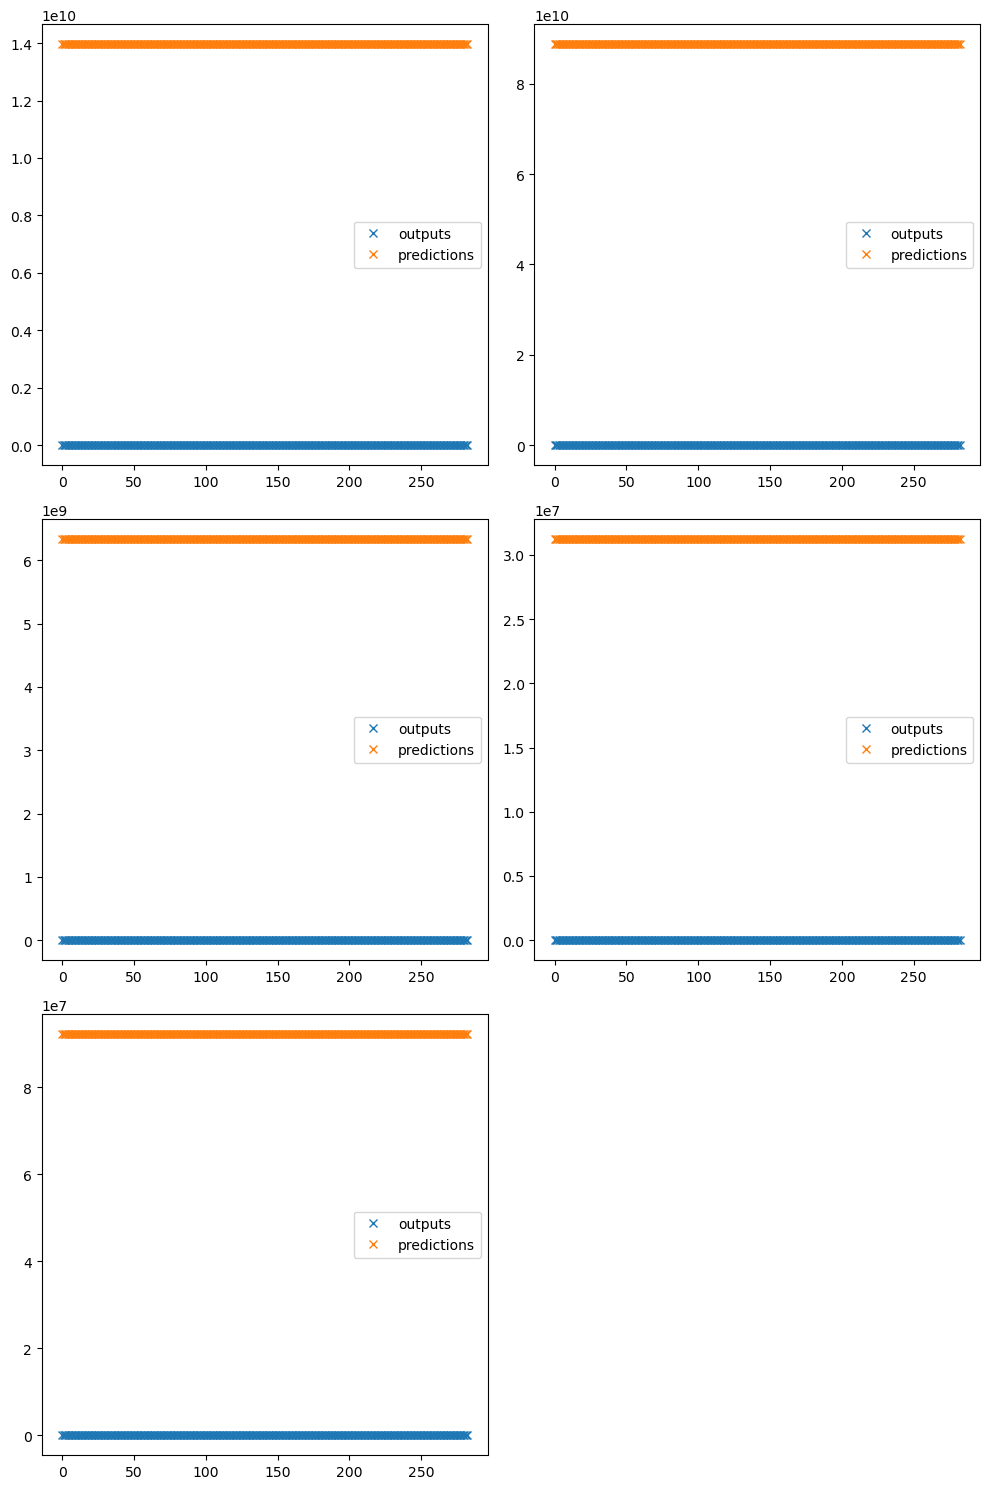

In [58]:
import matplotlib.pyplot as plt
nrows, ncols = 3, 2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 15))
for i in range(nrows * ncols):
    ax_i = ax[i // ncols, i % ncols]
    if i < outputs_small.shape[1]:
        sort_idx = torch.argsort(outputs_small[:, i])
        x_axis = torch.arange(outputs_small.shape[0])
        ax_i.plot(x_axis, outputs_small[sort_idx, i], "C0x", label="outputs")
        ax_i.plot(x_axis, predictions[sort_idx, i], "C1x", label="predictions")
        ax_i.legend()
    else:
        ax_i.axis('off')
fig.tight_layout()

# Load model using model id
Once your model has been registered, you can use the `Model` api object to interact with your model without running the above registration steps. Let's load a new model object using the model_id we registered above.

In [30]:
from importlib import reload 
import lume_services
reload(lume_services.models)
from lume_services.models import Model

#model_id = model.metadata.model_id
loaded_model = Model(model_id=1)

INFO:lume_services.services.models.db.db:ModelDB selecting: SELECT model.model_id, model.created, model.author, model.laboratory, model.facility, model.beampath, model.description 
FROM model 
WHERE model.model_id = :model_id_1


In [31]:
loaded_model.metadata

Model(                     model_id=1,                     created=datetime.datetime(2023, 8, 2, 6, 9, 14),                     author='Aman Singh Thakur'),                     laboratory='slac',                     facility='lcls',                     beampath='cu',                     description='lcls-cu-inj-nn'                 )

## Load existing model object
Loading a model using the load_deployment method without passing a deployment_id will load the latest deployment registered for the model.

In [32]:
loaded_model.load_deployment()
loaded_model.deployment

INFO:lume_services.models.model:Loading latest deployment.
INFO:lume_services.services.models.db.db:ModelDB selecting: SELECT deployment.deployment_id, deployment.version, deployment.deploy_date, deployment.package_import_name, deployment.asset_dir, deployment.source, deployment.sha256, deployment.image, deployment.is_live, deployment.model_id 
FROM deployment 
WHERE deployment.model_id = :model_id_1 ORDER BY deployment.deploy_date DESC
INFO:lume_services.services.models.db.db:ModelDB selecting: SELECT flow.flow_id, flow.flow_name, flow.project_name, flow.deployment_id 
FROM flow 
WHERE flow.deployment_id = :deployment_id_1
INFO:lume_services.services.models.db.db:ModelDB selecting: SELECT project.project_name, project.description 
FROM project 
WHERE project.project_name = :project_name_1
INFO:lume_services.services.models.db.db:ModelDB selecting: SELECT flow_of_flows._id, flow_of_flows.parent_flow_id, flow_of_flows.flow_id, flow_of_flows.position 
FROM flow_of_flows 
WHERE flow_of_fl

Deployment(metadata=Deployment(                 deployment_id=1,                 model_id=1,                 version='0.0.32',                 deploy_date=datetime.datetime(2023, 8, 2, 6, 9, 59)),                 asset_dir=None,                 source='https://github.com/singh96aman/lume-lcls-cu-inj-nn/releases/download/v0.0.32/lume_lcls_cu_inj_nn-0.0.32.tar.gz',                 sha256='4adca30a9b6f12d135b90be1353536763dddf4a3e7762dd7aaef455b1120d0a6',                 image='scr.svc.stanford.edu/aman96/lume-lcls-cu-inj-nn:v0.0.32',                 is_live=True                 package_import_name='lume_lcls_cu_inj_nn'                 ), project=Project(metadata=Project(                 project_name='gpu-box-new2',                 description='my_description',                 )), flow=Flow(name='lume-lcls-cu-inj-nn', flow_id='7e5adf50-962f-4b50-93da-a0c86a960b3e', project_name='gpu-box-new2', prefect_flow=None, parameters=None, mapped_parameters=None, task_slugs=None, labels=['lume-servi

In [ ]:
result = loaded_model.run_and_return(
    parameters={
                        "distgen:r_dist:sigma_xy:value": 0.4130, 
                        "distgen:total_charge:value": 250.0, 
                        "distgen:t_dist:length:value":7.499772441611215, 
                        "SOL1:solenoid_field_scale": 0.17, 
                        "CQ01:b1_gradient":-0.0074,
                        "SQ01:b1_gradient": -0.0074,
                        "L0A_phase:dtheta0_deg": -8.8997,
                        "L0A_scale:voltage": 70000000.0,
                        "distgen:t_dist:length:value": 7.499772441611215,
                        "end_mean_z": 4.6147002
    },
    task_name="save_db_result" # Want to get the result from the save_db_result task
)
result

In [35]:
results_df = loaded_model.get_results_df()
results_df

0    0.000017
Name: end_norm_emit_x, dtype: float64